In [1]:
import numpy as np
import random 
import math 
import time
import gym
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from gym import spaces

In [3]:
space = spaces.Discrete(8) # Set with 8 elements {0, 1, 2, ..., 7}
print (space)
x = space.sample()
print (x)
assert space.contains(x)
assert space.n == 8 

Discrete(8)
4


In [4]:
env = gym.make('CartPole-v0')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [6]:
# One of the actions applies force to the left, and one of them applies force to the right. 
print (env.action_space)
print (env.observation_space)

Discrete(2)
Box(4,)


In [6]:
print (env.observation_space.high)
print (env.observation_space.low)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


### CartPole Example: with random actions

In [88]:
# take only random actions, dont update anything, or learn anything 
num_stands = []

for epoch in range(200):
    
    observation = env.reset()
    print (observation)
    i = 0 
    
    for i in range(100):
        
#         env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        print ('observation is ', observation)
        
        if done:
            print ("Episode finished after {} steps".format(i+1))
            print ('')
            break 
        
    num_stands.append(i)

[ 0.01241642  0.04177104 -0.04706919 -0.00419259]
observation is  [ 0.01325184  0.23753533 -0.04715304 -0.31134702]
observation is  [ 0.01800255  0.04311577 -0.05337998 -0.03389968]
observation is  [ 0.01886486 -0.15120168 -0.05405798  0.24147505]
observation is  [ 0.01584083  0.04464913 -0.04922848 -0.06775732]
observation is  [ 0.01673381 -0.14973374 -0.05058362  0.20899641]
observation is  [ 0.01373913  0.04607364 -0.04640369 -0.09920421]
observation is  [ 0.01466061 -0.14835361 -0.04838778  0.17848492]
observation is  [ 0.01169354 -0.34275091 -0.04481808  0.45551912]
observation is  [ 0.00483852 -0.53721148 -0.0357077   0.73374496]
observation is  [-0.00590571 -0.34161485 -0.0210328   0.43004121]
observation is  [-0.01273801 -0.53643274 -0.01243197  0.71602023]
observation is  [-0.02346666 -0.73138043  0.00188843  1.00476426]
observation is  [-0.03809427 -0.92652755  0.02198372  1.29803962]
observation is  [-0.05662482 -1.12192164  0.04794451  1.59752262]
observation is  [-0.079063

Text(0,0.5,'num_stands took')

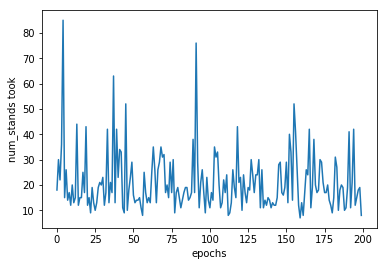

In [90]:
plt.plot(range(200), num_stands)
plt.xlabel('epochs')
plt.ylabel('num_stands took')

<br><br/>

### CartPole Example: with Q-learning

In this problem, the states are continuous, you gotta find a way to discretize the space. Real world problems. 

In [11]:
# data from a continuous uniform distribution, between [0, 1) 
data = np.random.random(100)
bins = np.linspace(0, 1, 10)
digitized = np.digitize(data, bins)
print (digitized)
bin_means = [data[digitized == i].mean() for i in range(1, len(bins))]
print (bin_means)

[9 5 5 1 4 4 2 6 6 5 9 8 2 3 7 5 3 2 3 8 2 9 2 4 5 1 9 7 2 5 6 1 8 6 4 7 1
 9 8 4 2 5 1 9 2 5 3 6 6 7 8 4 6 2 7 3 2 4 4 5 1 9 1 9 5 1 4 8 7 7 4 8 3 1
 9 7 5 9 6 7 7 5 5 3 7 8 4 9 5 9 5 5 2 2 8 7 1 2 6 9]
[0.04737110341958661, 0.18516497756631273, 0.2785480178321226, 0.38264716199622284, 0.4900486526687785, 0.6064433195871409, 0.7111697504652579, 0.8312521814433232, 0.945747898095517]


In [109]:
numbers_per_bin = [[], [], [], [], [], [], [], [], [],[]]


for i in range(len(digitized)):
    for j in range(len(bins)):
        if digitized[i] == j:
            # print (i)
            numbers_per_bin[j].append(data[i])  
            
# np.array(numbers_per_bin[9]).mean()
# data[digitized == 9].mean()

In [98]:
observation = env.reset()
print (observation)
print ('')
print (list(zip(env.observation_space.low, env.observation_space.high)))

[-0.03063398  0.03290449 -0.02251128  0.04600191]

[(-4.8, 4.8), (-3.4028235e+38, 3.4028235e+38), (-0.41887903, 0.41887903), (-3.4028235e+38, 3.4028235e+38)]


In [15]:
inter = list(zip(env.observation_space.low, env.observation_space.high))[2][1] - list(zip(env.observation_space.low, env.observation_space.high))[2][0]
list(zip(env.observation_space.low, env.observation_space.high))[2][1] - inter/2 

0.0

In [ ]:
n_bins = 2
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_bins = [pd.cut(list(state_bounds[i]), bins=n_bins, retbins=True)[1] for i in range(4)] 
cart_position_bins = state_bins[0]
cart_velocity_bins = state_bins[1]
pole_angle_bins = state_bins[2]
pole_angular_velocity_bins = state_bins[3]

In [ ]:
observation = env.reset()
cart_position, cart_velocity, pole_angle, pole_angular_velocity = observation
print (observation)
print (to_bin(cart_position, cart_position_bins)) 
print (to_bin(cart_velocity, cart_velocity_bins)) 
print (to_bin(pole_angle, pole_angle_bins)) 
print (to_bin(pole_angular_velocity, pole_angular_velocity_bins)) 

In [27]:
## Learning related constants
# MIN_EXPLORE_RATE = 0.01
# MIN_LEARNING_RATE = 0.1


class GymQLearner():
    

    def __init__(self, lr, gamma):
        
        
        self.debug_mode = True 
        
#         self.epsilon = epsilon 
#         self.n_bins = n_bins

        self.reward = 0 
        self.gamma = gamma # 0.99
        self.lr = lr # 0.5
             
            
        
        self.n_features = 4
        self.action_space = env.action_space.n
#         self.state_space = (self.n_bins)**self.n_features
        self.state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
        self.state_bounds[1] = [-0.5, 0.5]
        self.state_bounds[3] = [-math.radians(50), math.radians(50)]
#         self.state_bounds = [[-0.05, 0.05], [-0.05, 0.05], [-0.05, 0.05], [-0.05, 0.05]]
        
#         self.state_bounds = [[-2.4, 2.4], [-1, 1], [-2, 2], [-3.5, 3.5]] 
    
        
        self.random_actions_per_episode = []
        
        
        
    def get_explore_rate(self, t):
        return max(MIN_EXPLORE_RATE, min(1, 1.0 - math.log10((t+1)/25)))

    def get_learning_rate(self, t):
        return max(MIN_LEARNING_RATE, min(0.5, 1.0 - math.log10((t+1)/25)))



    def build_state(self, features):
#         state_num = features[0] + features[1]*self.n_bins + features[2]*(self.n_bins**2) + features[3]*(self.n_bins**3)
        state_num = features[2] * 3 - (3 - features[3]) 
#         state_num = tuple(features)
        return state_num 
        

    def to_bin(self, value, bins):
#         return (np.digitize(x=[value], bins=bins)[0]-1) 
        minvalue = min(bins)
        maxvalue = max(bins)
        if value >= maxvalue:
            return len(bins) - 2 
        elif value <= minvalue:
            return 0
        else:
            binvalue = np.digitize(x=[value], bins=bins)[0] - 1 
            return binvalue
        
    
    def discretize_states(self):
#         state_bins = [pd.cut(list(self.state_bounds[i]), bins=self.n_bins, retbins=True)[1] for i in range(4)] # 4 is hardcoded for the moment 
        self.cart_position_bins = pd.cut(list(self.state_bounds[0]), bins=1, retbins=True)[1] # state_bins[0]
        self.cart_velocity_bins = pd.cut(list(self.state_bounds[1]), bins=1, retbins=True)[1] # state_bins[1]
        self.pole_angle_bins = pd.cut(list(self.state_bounds[2]), bins=6, retbins=True)[1] # state_bins[2]
        self.pole_angular_velocity_bins = pd.cut(list(self.state_bounds[3]), bins=3, retbins=True)[1] # state_bins[3]
        
        

    def initialize_Q_table(self):
        # self.Q = np.zeros(self.state_space, self.action_space)
        # or initialize randomly. 
#         self.Q = np.random.randn(self.state_space, self.action_space)
#         self.Q = np.random.randn(18, self.action_space)
        self.Q = np.zeros((18, 2)) 
#         self.Q = np.random.randn(18, 2) 
        
     
        
    
    def update_Q(self, s, s1, a):
        print ('Q[s, a] old ', self.Q[s,a])
        self.Q[s,a] = self.Q[s,a] + self.lr*(self.reward + self.gamma*np.amax(self.Q[s1,:]) - self.Q[s,a])
        print ('Q[s, a] new ', self.Q[s,a])
        
        
    def choose_action(self, s):
        
#         if np.random.rand(1) < self.epsilon: 
        if random.random() < self.epsilon:
            action = env.action_space.sample()
            self.random_action += 1 
        else: 
            action = np.argmax(self.Q[s, :]) 
        return action 
          

            
    def run_episodes(self):
        
#         self.num_steps = []
        self.initialize_Q_table()
        self.discretize_states()
        self.rewards = []
        self.average_reward = []
        
        self.random_actions_per_epoch = []
        
        self.num_streaks = 0 
#         self.lr = self.get_learning_rate(0) 
        print ('First learning rate ', self.lr)
        self.epsilon = self.get_explore_rate(0)
        
         
        
        
        for epoch in range(600):
            
#             print ("This is epoch ", epoch)
            self.random_action = 0
            self.reward_per_epoch = 0

            observation = env.reset()

            cart_position, cart_velocity, pole_angle, pole_angular_velocity = observation
            s = self.build_state([self.to_bin(cart_position, self.cart_position_bins),
                 self.to_bin(cart_velocity, self.cart_velocity_bins),
                 self.to_bin(pole_angle, self.pole_angle_bins),
                 self.to_bin(pole_angular_velocity, self.pole_angular_velocity_bins)])
                                     
#             s = self.state_to_bucket(observation)
            
            for i in range(250):
                                
#                 env.render()
                # choose action either randomly, or from Q
                a = self.choose_action(s)             
                
                # observe the new state, reward and all
                observation, self.reward, done, info = env.step(a)
                
                # translate the new observations into a discrete state 
                cart_position, cart_velocity, pole_angle, pole_angular_velocity = observation
                s1 = self.build_state([self.to_bin(cart_position, self.cart_position_bins),
                 self.to_bin(cart_velocity, self.cart_velocity_bins),
                 self.to_bin(pole_angle, self.pole_angle_bins),
                 self.to_bin(pole_angular_velocity, self.pole_angular_velocity_bins)])
               

                # update Q and set the old state to the new state. 
                self.update_Q(s, s1, a)
                s = s1 
                self.reward_per_epoch += self.reward
                
                
                # Print data
                if (self.debug_mode):
                    print("\nEpisode = %d" % epoch)
                    print("i = %d" % i)
                    print("Action: %d" % a)
                    print("State: %s" % str(s)) 
                    print("Reward: %f" % self.reward)
#                     print("Best Q: %f" % best_q)
                    print("Best Q: %f" % max(self.Q[s, :]))
                    print("Explore rate: %f" % self.epsilon)
                    print("Learning rate: %f" % self.lr)
                    print("Streaks: %d" % self.num_streaks)

                if done:
#                     self.reward_per_epoch += self.reward
                    print ('Episode finished with %d timesteps' %i)
                    if (i >= 199):
                        self.num_streaks += 1
                    
                    break 
                       
        
                    # Update parameters
            self.epsilon = self.get_explore_rate(epoch)
#             self.lr = self.get_learning_rate(epoch)


            self.rewards.append(self.reward_per_epoch)
            self.random_actions_per_epoch.append(self.random_action)
            
        
            if epoch % 100 == 0:
#                     print ("Average reward per episode ", np.mean(self.rewards[-100:]))
                    self.average_reward.append(np.mean(self.rewards[-100:]))
                    if np.mean(self.rewards[-100:]) >= 200: 
                        print ('SOLVED')
                        break 




<br> <Br/> 

Observations: implementing a learning that is changing through epochs is not necessary but it works. Setting it to 0.5 from the beginning also works with a gamma of .99, but not always, although it gives streaks. gamma=.9 doesnt solve.  




<p><p/>

First learning rate  0.5
Q[s, a] old  0.0
Q[s, a] new  0.5

Episode = 0
i = 0
Action: 1
State: 4
Reward: 1.000000
Best Q: 0.500000
Explore rate: 1.000000
Learning rate: 0.500000
Streaks: 0
Q[s, a] old  0.5
Q[s, a] new  0.75

Episode = 0
i = 1
Action: 1
State: 3
Reward: 1.000000
Best Q: 0.000000
Explore rate: 1.000000
Learning rate: 0.500000
Streaks: 0
Q[s, a] old  0.0
Q[s, a] new  0.5

Episode = 0
i = 2
Action: 0
State: 3
Reward: 1.000000
Best Q: 0.500000
Explore rate: 1.000000
Learning rate: 0.500000
Streaks: 0
Q[s, a] old  0.5
Q[s, a] new  1.1212499999999999

Episode = 0
i = 3
Action: 0
State: 4
Reward: 1.000000
Best Q: 0.750000
Explore rate: 1.000000
Learning rate: 0.500000
Streaks: 0
Q[s, a] old  0.0
Q[s, a] new  0.87125

Episode = 0
i = 4
Action: 0
State: 4
Reward: 1.000000
Best Q: 0.871250
Explore rate: 1.000000
Learning rate: 0.500000
Streaks: 0
Q[s, a] old  0.75
Q[s, a] new  1.30626875

Episode = 0
i = 5
Action: 1
State: 4
Reward: 1.000000
Best Q: 1.306269
Explore rate: 1.00000

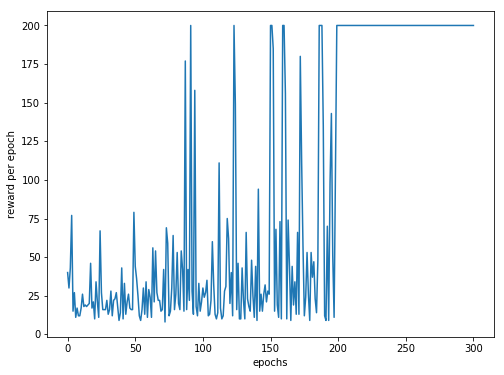

In [39]:
learning_rates = [0.5] # 0.005, 0.01, 0.05, 0.1, 0.8 , 
for i in range(len(learning_rates)):
    cartpole_qlearner = GymQLearner(lr=learning_rates[i], gamma=.99) # n_bins=8, epsilon=0.5
    cartpole_qlearner.run_episodes()
    print ('')
    fig = plt.figure(i, figsize=(8, 6))
    ax1 = fig.add_subplot(111)
    ax1.plot(range(len(cartpole_qlearner.rewards)), cartpole_qlearner.rewards) # cartpole_qlearner.rewards
    plt.xlabel('epochs')
    plt.ylabel('reward per epoch')
    

Text(0,0.5,'average reward for 100 epochs')

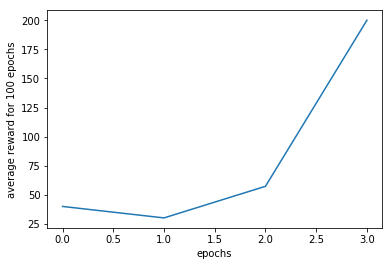

In [40]:
plt.plot(range(len(cartpole_qlearner.average_reward)), cartpole_qlearner.average_reward)
plt.xlabel('epochs')
plt.ylabel('average reward for 100 epochs')